**1.  Sigmoid 층으로 들어오는 데이터 배치 묶음 $X$와 위에서 흘러들어오는 미분 $\partial L \over \partial Y$이 각각
$$
X=\begin{pmatrix}\log 2&\log 3&\log 4&\log 5\\\log 6&\log 7&\log 8&\log 9 \end{pmatrix}, \qquad {\partial L \over \partial Y} = \begin{pmatrix} 3^2&4^2&5^2&6^2\\7^2&8^2&9^2&10^2\end{pmatrix}
$$
이라 하자.**

**(i) 밑으로 흘려보내는 미분 $\partial L \over \partial X$을 구하시오.**
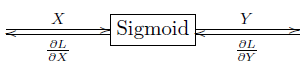

역전파를 하기위해서는 순전파가 선행되어야 합니다.
순전파의 계산 결과를 역전파때 사용하기 때문입니다.
데이터 배치 묶음 $X$를 시그모이드 층에 통과시키면
$$
Y=
\begin{pmatrix}{1 \over 1+e^{-\log2}}& {1 \over 1+e^{-\log3}}& {1 \over 1+e^{-\log4}}& {1 \over 1+e^{-\log5}} \\
{1 \over 1+e^{-\log6}}& {1 \over 1+e^{-\log7}}& {1 \over 1+e^{-\log8}}& {1 \over 1+e^{-\log9}}\end{pmatrix} =
\begin{pmatrix}{1 \over 1+1/2}& {1 \over 1+1/3}& {1 \over 1+1/4}& {1 \over 1+1/5} \\
{1 \over 1+1/6}& {1 \over 1+1/7}& {1 \over 1+1/8}& {1 \over 1+1/9}\end{pmatrix} =
\begin{pmatrix}{2 \over 3}& {3 \over 4}& {4 \over 5}& {5 \over 6} \\
{6 \over 7}& {7 \over 8}& {8 \over 9}& {9 \over 10}\end{pmatrix}
$$
를 얻습니다.

시그모이드 함수의 미분공식은 $y'=y(1-y)$입니다.
흘러들어온 미분에 시그모이드 미분 공식을 곱해서 밑으로 흘려보내는 미분
$$
{\partial L \over \partial X} =
\begin{pmatrix}{2 \over 3}\cdot(1-{2 \over 3})\cdot3^2& {3 \over 4}\cdot(1-{3 \over 4})\cdot4^2& {4 \over 5}\cdot(1-{4 \over 5})\cdot5^2& {5 \over 6}\cdot(1-{5 \over 6})\cdot6^2 \\
{6 \over 7}\cdot(1-{6 \over 7})\cdot7^2& {7 \over 8}\cdot(1-{7 \over 8})\cdot8^2& {8 \over 9}\cdot(1-{8 \over 9})\cdot9^2& {9 \over 10}\cdot(1-{9 \over 10})\cdot10^2\end{pmatrix} =
\begin{pmatrix}2&3&4&5\\6&7&8&9\end{pmatrix}
$$
을 얻습니다.

**(ii) Sigmoid 클래스로 검산하시오.**

In [1]:
import sys
sys.path.append('C://Users//HAN//Documents//Deep Learning from Scratch') # 각자의 경로로 수정해주세요.
import numpy as np
from common.layers import Sigmoid

In [2]:
X = np.log(np.array([[2,3,4,5],[6,7,8,9]]))
dout = np.array([[3,4,5,6],[7,8,9,10]])**2

sigmoid = Sigmoid()

sigmoid.forward(X)
dx = sigmoid.backward(dout)

print(dx)

[[2. 3. 4. 5.]
 [6. 7. 8. 9.]]


**2. 다음과 같이 Sigmoid층 클래스를 작성했더니 순전파는 정상적으로 작동했으나 역전파는 에러가 났다. 그 이유를 설명하고 코드를 수정하시오.**

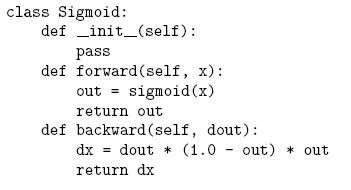

`out=sigmoid(x)`라 두면 `forward` 메서드안의 로컬 변수로 저장된다.  
역전파 공식 $y'=y(1-y)$에서 알수있다시피 역전파 계산할때 순전파 값이 필요하다.  
`backward` 메서드에서는 로컬변수 `out`을 알수 없다.  
따라서, `out`을 `self.out`으로 수정해서 글로벌 변수로 만들어야 `backward` 메서드에서 인식할 수 있다.

**3. ReLU층으로 들어오는 데이터 배치 묶음 $X$와 위에서 흘러들어오는 미분 $\partial L \over \partial Y$이 각각
$$
X=\begin{pmatrix}1&-2&3&-4 \\-5&6&-7&8 \end{pmatrix} , \qquad {\partial L \over \partial Y} = \begin{pmatrix} 1&-2&-3&4 \\ -1&2&3&-4 \end{pmatrix}
$$
이라 하자.**

**(i) 밑으로 흘려보내는 미분 $\partial L \over \partial X$을 구하시오.**
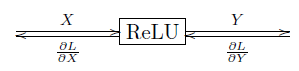

역전파를 하기위해서는 순전파가 선행되어야 합니다.
순전파의 계산 결과를 역전파때 사용하기 때문입니다.
데이터 배치 묶음 $X$를 ReLu 층에 통과시키면 음수가 죽어서
$$
Y=
\begin{pmatrix}1&0&3&0\\0&6&0&8\end{pmatrix}
$$
을 얻습니다.
여기서 죽는 위치가 역전파에서 사용됩니다.

ReLu함수를 수식으로 쓰면 $x>0$일 때 $y=x$이고 $x<0$일 때 $y=0$입니다.
미분을 하면 $x>0$일 때 $y'=1$이고 $x<0$일 때 $y'=0$입니다.
흘러들어온 미분에 곱하면 $x>0$일때 그대로 흘려보내고 $x<0$일때 죽이라는 뜻입니다.
그대로 흘려보내냐 죽이냐는 기준이 미분값의 부호가 아니라 순전파 입력값의 부호입니다.
흘러들어온 미분에서 순전파때 음수인 위치를 죽이면
$$
{\partial Y \over \partial X} =
\begin{pmatrix} 1&0&-3&0 \\ 0&2&0&-4 \end{pmatrix}
$$
을 얻습니다.

**(ii) Relu 클래스로 검산하시오.**

In [3]:
from common.layers import Relu

X = np.array([[1,-2,3,-4],[-5,6,-7,8]])
dout = np.array([[1,-2,-3,4],[-1,2,3,-4]])

relu = Relu()

relu.forward(X)
dx = relu.backward(dout)

print(dx)

[[ 1  0 -3  0]
 [ 0  2  0 -4]]


**4. 다음과 같이 Affine층과 Sigmoid층이 번갈아 가며 나타나는 10층 신경망을 생각하자.
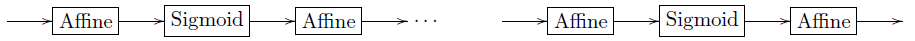
각 층의 뉴런의 개수는 모두 100개이다. 각 Affine층의 가중치 행렬은 평균 0, 표준편차 0.1인 정규분포를 따라 랜덤하게 생성되었고 편향벡터는 영벡터이다.**

**(i) 입력층에 들어오는 데이터와 마지막 층으로 들어오는 미분은 $[0,1]$위의 균등분포를 따라 랜덤하게 생성되었다. 각 Affine 층의 가중치 행렬에 대한 미분의 원소들의 제곱의 합을 출력하시오.**

오랫동안 딥러닝 전문가들은 활성화 함수로 시그모이드를 사용해 왔습니다.
인공신경망이 모방한 뉴런의 작동방식을 생각해보면 이는 자연스러운 선택이었겠죠.
하지만 시그모이드 함수는 층이 깊어졌을때 심각한 문제가 있습니다.
그래프
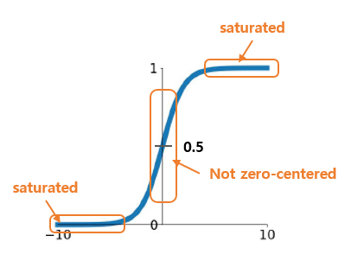
를 보면 원점에서 조금만 멀리 떨어지면 미분계수의 크기가 매우 작아집니다.
역전파는 수학적으로 연쇄법칙입니다.
각 층을 미분해서 계속 곱해나가는 것이지요.
작은 숫자를 계속 곱하다보면 낮은 층은 gradient의 크기가 너무 작아집니다.
gradient의 크기가 너무 작으면 경사하강법을 적용했을 때 파라미터가 미세하게만 업데이트 됩니다.
그래서 높은 층은 학습이 되지만 낮은 층은 학습이 거의 되지 않아 층을 깊게 쌓을 이유가 사라집니다.
이를 vanishing gradient라고 하고 딥러닝에서 중요한 주제입니다.
딥러닝 II 6,7강에서 다루는 주제입니다.

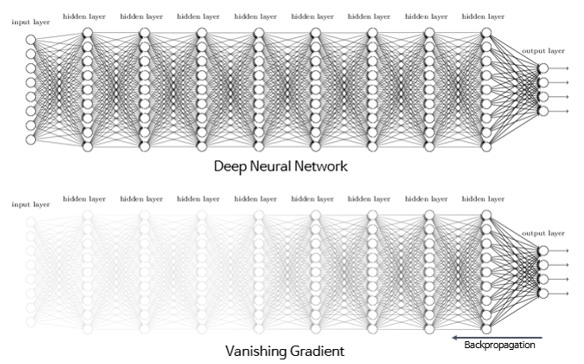

In [4]:
from common.layers import Affine

layers=[]

b = np.zeros(100)

for k in range(11):
    W = 0.1*np.random.randn(100,100)
    layers.append(Affine(W,b))
    if k != 10:
        layers.append(Sigmoid())

x = np.random.rand(1,100)

for k in range(21):
    x = layers[k].forward(x)

dout = np.random.rand(1,100)

for k in range(21):
    dout = layers[20-k].backward(dout)
    if k % 2 == 0:
        print(np.sum((layers[20-k].dW)**2))

983.5352349533141
58.3529580016449
2.846014438975632
0.17870971655474943
0.010771025574439836
0.0005691150451801338
2.7080547657548937e-05
1.3545248684897624e-06
8.211928663343707e-08
4.551099939091421e-09
3.108713627809592e-10


**(ii) 활성화 함수를 Relu로 바꾼후 동일한 작업을 하시오.**

vanishing gradient 문제를 억제하기 위한 기법이 여럿있습니다. 그중의 하나가 활성화 함수를 시그모이드 함수 대신 relu함수를 사용하는 것입니다.
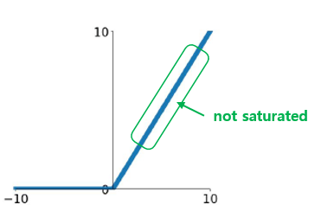

In [5]:
layers=[]

b = np.zeros(100)

for k in range(11):
    W = 0.1*np.random.randn(100,100)
    layers.append(Affine(W,b))
    if k != 10:
        layers.append(Relu())

x = np.random.rand(1,100)

for k in range(21):
    x = layers[k].forward(x)

dout = np.random.rand(1,100)

for k in range(21):
    dout = layers[20-k].backward(dout)
    if k % 2 == 0:
        print(np.sum((layers[20-k].dW)**2))

0.2396017991686576
0.23878316177168923
0.27654896409776064
0.45827295980356925
0.4826624329471306
0.550860311252428
0.5914772630416797
0.6030740001511558
1.2871395312857974
0.9501787362135354
0.9522024280015031
